In [40]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from timeit import default_timer as timer

pi = math.pi

0.0013117999988025986


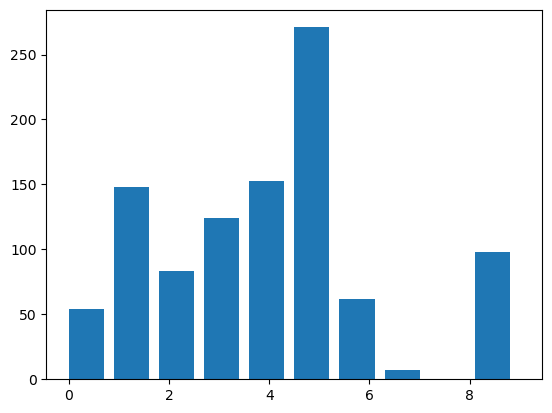

In [41]:
#4 Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

def num(b, n, r):
    for i in range(10):
        if (b[i] >= r):
            return(n[i])
w = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
w = w/w.sum()
b = np.array([w[:i+1].sum() for i in range(10)])
n = np.arange(10)

time1=timer()
random = np.array([num(b, n, np.random.rand()) for i in range(1000)])
time2=timer()  
    
print(time2-time1)
    
plt.hist(random, width = 0.7)
plt.show()

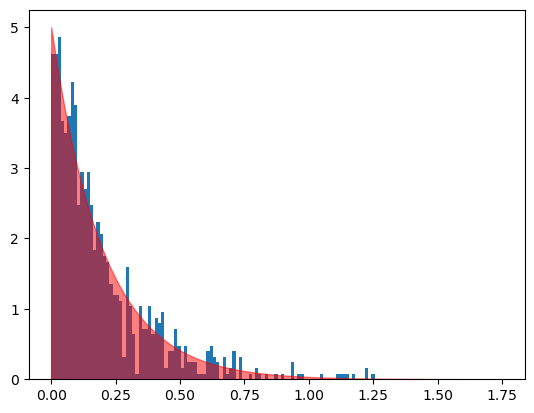

In [42]:
#5 Смоделируйте выборку размера 1000 из распределения 𝐸𝑥𝑝(𝜆) . Постройте выборочную гистограмму и точный график плотности распределения.

random = np.array([np.log(1/(1-np.random.rand()))/5 for i in range(1000)]);
plt.hist(random, bins=100, density=True)
x = np.linspace(0, 1.75, 100)
density = 5*np.exp(-x*5)
plt.fill_between(x, 0, density,color='r' ,alpha=0.50)
plt.show()


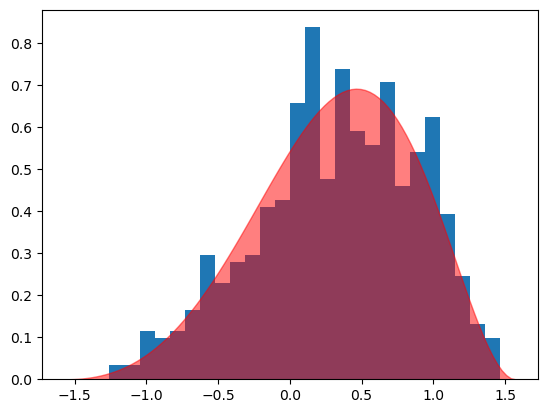

In [44]:
# 6. Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

x = np.arange(-pi/2, pi/2, 0.01)
k = max(np.exp(x)*np.cos(x)**2 / (1/math.sqrt(2*pi))*np.exp(-x*x/2))


def sample(size):
    xs = np.random.normal(0, 1, size=size)
    cs = np.random.uniform(0, 1, size=size)
    mask = np.exp(xs)*np.cos(xs)**2 / (k * (1/math.sqrt(2*pi))*np.exp(-xs*xs/2)) > cs
    return xs[mask] 

samples = sample(1000)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(samples, 30, range = (-pi/2, pi/2),density=True)
x = np.linspace(-np.pi/2, np.pi/2, 100)
density = (np.exp(x)*np.cos(x)**2)/(0.4*(np.exp(np.pi/2)-np.exp(-np.pi/2)))  #normalized density!
plt.fill_between(x, 0, density,color='r',alpha=0.5)
plt.show()

C:\Users\админ\AppData\Local\Temp\ipykernel_12164\3678853372.py:16: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)


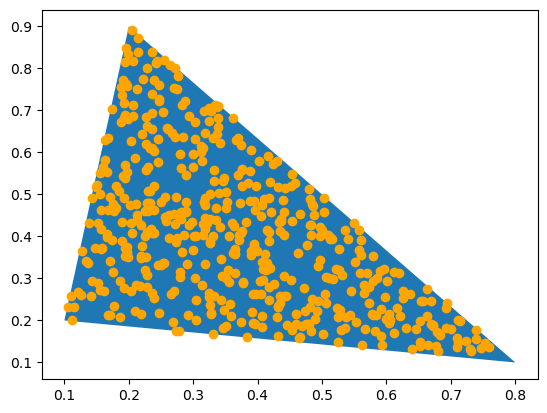

In [27]:
#7 Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

a = np.array([np.random.rand() for i in range(500)])
b = np.array([np.random.rand() for i in range(500)])

x = 1+1*a+7*b
y = 2+7*a-b

for i in range(500):
    if (y[i]>(-4/3)*x[i]+35/3):
        x[i] = 1 - (x[i] - 9)
        y[i] = 2 - (y[i] - 8)

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x/10, y/10, color = 'orange')
plt.show()

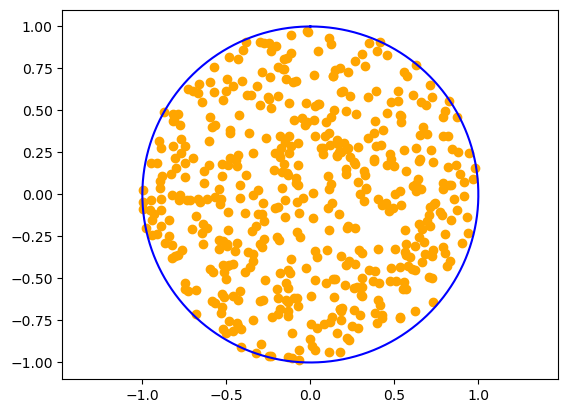

In [28]:
#8 Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.
r=np.sqrt([np.random.rand() for i in range(500)])
a=np.array([np.random.rand() for i in range(500)])*2*np.pi
plt.scatter(r*np.cos(a),r*np.sin(a),color='orange')

teta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.sin(teta), np.cos(teta), c = 'b')

plt.axis('equal')
plt.show()

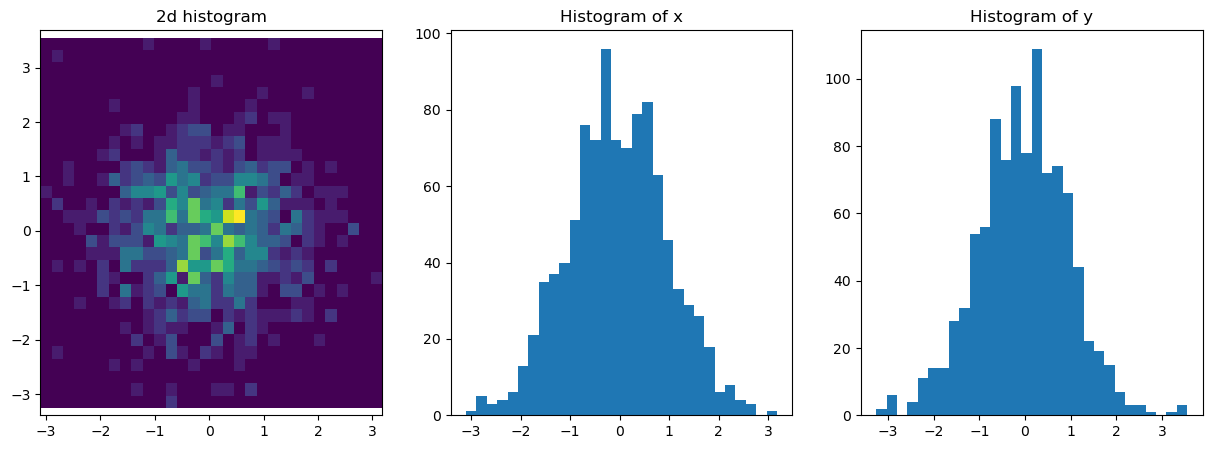

In [46]:
#9 Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

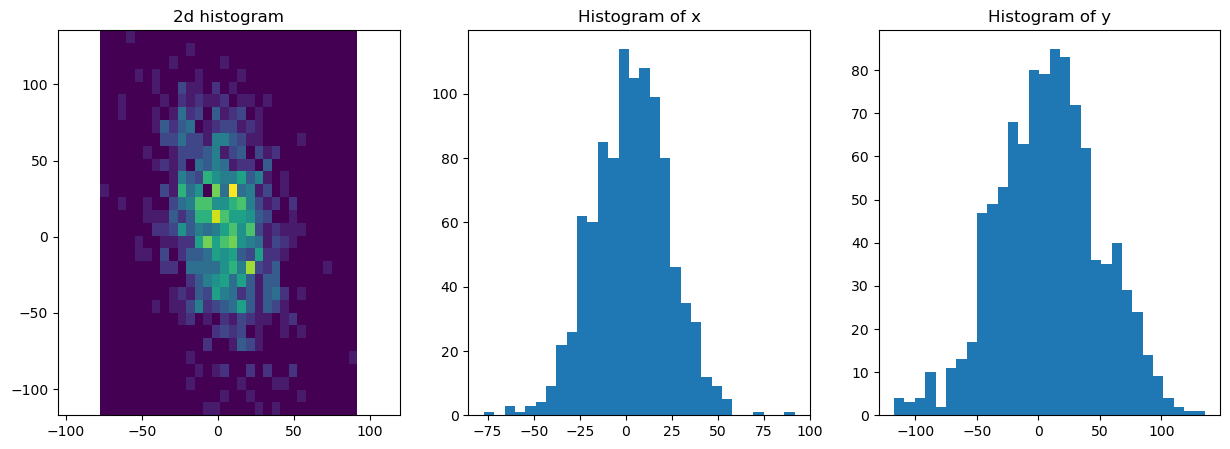

[2.9931316628427336, 8.552485855010072]
[[ 421.32186462 -261.67393562]
 [-261.67393562 1713.77499153]]


In [52]:
n = 1000
u1, u2 = np.random.rand(2, n)*2 - 1
for i in range(n):
    while u1[i]**2+u2[i]**2 > 1:
        u1[i], u2[i]=np.random.rand(2)*2 - 1
mod = u1**2+u2**2
lx = u1 * np.sqrt(-2*np.log(mod)/mod)
ly = u2 * np.sqrt(-2*np.log(mod)/mod)
x = lx * 20 -4*ly + 4
y = -4*lx + 40*ly + 7
mid=[x.sum()/1000,y.sum()/1000]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()
print(mid)
print(np.cov(x,y))